<a href="https://colab.research.google.com/github/NickDC97/NickDC97/blob/main/pyspark_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Pip Install Pyspark**


In [1]:
!pip install pyspark==3.0.1 py4j==0.10.9 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.2/204.2 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 12.4 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612229 sha256=ea120a2a84bd86a173f251c46889328c0b725eb6a4cdc5078019a969ab7399de
  Stored in directory: /root/.cache/pip/wheels/19/b0/c8/6cb894117070e130fc44352c2a13f15b6c27e440d04a84fb48
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [4]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local[2]")\
        .appName('PySpark_Tutorial')\
        .getOrCreate()

In [5]:
csv_file = '/content/stocks_price_final.csv'
df = spark.read.csv(csv_file)

In [6]:
# Before structuring schema

data = spark.read.csv(
    '/content/stocks_price_final.csv',
    sep = ',',
    header = True,
    )

data.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- symbol: string (nullable = true)
 |-- date: string (nullable = true)
 |-- open: string (nullable = true)
 |-- high: string (nullable = true)
 |-- low: string (nullable = true)
 |-- close: string (nullable = true)
 |-- volume: string (nullable = true)
 |-- adjusted: string (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



In [8]:
from pyspark.sql.types import *

data_schema = [
               StructField('_c0', IntegerType(), True),
               StructField('symbol', StringType(), True),
               StructField('data', DateType(), True),
               StructField('open', DoubleType(), True),
               StructField('high', DoubleType(), True),
               StructField('low', DoubleType(), True),
               StructField('close', DoubleType(), True),
               StructField('volume', IntegerType(), True),
               StructField('adjusted', DoubleType(), True),
               StructField('market.cap', StringType(), True),
               StructField('sector', StringType(), True),
               StructField('industry', StringType(), True),
               StructField('exchange', StringType(), True),
            ]

final_struc = StructType(fields = data_schema)

data = spark.read.csv(
    '/content/stocks_price_final.csv',
    sep = ',',
    header = True,
    schema = final_struc 
    )

data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- data: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: integer (nullable = true)
 |-- adjusted: double (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



In [9]:
data.dtypes

[('_c0', 'int'),
 ('symbol', 'string'),
 ('data', 'date'),
 ('open', 'double'),
 ('high', 'double'),
 ('low', 'double'),
 ('close', 'double'),
 ('volume', 'int'),
 ('adjusted', 'double'),
 ('market.cap', 'string'),
 ('sector', 'string'),
 ('industry', 'string'),
 ('exchange', 'string')]

In [11]:
data.head(5)

[Row(_c0=1, symbol='TXG', data=datetime.date(2019, 9, 12), open=54.0, high=58.0, low=51.0, close=52.75, volume=7326300, adjusted=52.75, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=2, symbol='TXG', data=datetime.date(2019, 9, 13), open=52.75, high=54.355, low=49.150002, close=52.27, volume=1025200, adjusted=52.27, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=3, symbol='TXG', data=datetime.date(2019, 9, 16), open=52.450001, high=56.0, low=52.009998, close=55.200001, volume=269900, adjusted=55.200001, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=4, symbol='TXG', data=datetime.date(2019, 9, 17), open=56.209999, high=60.900002, low=55.423, close=56.779999, volume=602800, adjusted=56.779999, market.cap='$9.31B', sector='Capit

In [12]:
data.show()

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

In [15]:
data.describe().show()

+-------+-----------------+-------+-----------------+------------------+------------------+------------------+------------------+------------------+----------+----------------+--------------------+--------+
|summary|              _c0| symbol|             open|              high|               low|             close|            volume|          adjusted|market.cap|          sector|            industry|exchange|
+-------+-----------------+-------+-----------------+------------------+------------------+------------------+------------------+------------------+----------+----------------+--------------------+--------+
|  count|          1667354|1667354|          1664757|           1664757|           1664757|           1664757|           1663699|           1664757|   1667354|         1667354|             1667354| 1667354|
|   mean|         833677.5|   null|72.89465782507025| 75.14873143051244| 70.56100873815215| 72.68401897847772|1363590.4537208953| 72.21050717433585|      null|            n

In [16]:
data = data.withColumnRenamed('data', 'date')

In [17]:
data.show()

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      date|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

In [18]:
# Remove Rows with Missing Values

data.na.drop()

AnalysisException: ignored

In [19]:
## Selecting Single Column

data.select('sector').show(5)

## Selecting Multiple columns

data.select(['open', 'close', 'adjusted']).show(5)

+-------------+
|       sector|
+-------------+
|Capital Goods|
|Capital Goods|
|Capital Goods|
|Capital Goods|
|Capital Goods|
+-------------+
only showing top 5 rows

+---------+---------+---------+
|     open|    close| adjusted|
+---------+---------+---------+
|     54.0|    52.75|    52.75|
|    52.75|    52.27|    52.27|
|52.450001|55.200001|55.200001|
|56.209999|56.779999|56.779999|
|56.849998|     62.0|     62.0|
+---------+---------+---------+
only showing top 5 rows



In [21]:
from pyspark.sql.functions import col, lit

data.filter( (col('date') >= lit('2020-01-01')) & (col('date') <= lit('2020-01-31')) ).show(5)


+---+------+----------+---------+---------+---------+---------+------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      date|     open|     high|      low|    close|volume| adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+------+---------+----------+-------------+--------------------+--------+
| 78|   TXG|2020-01-02|76.910004|77.989998|71.480003|72.830002|220200|72.830002|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 79|   TXG|2020-01-03|71.519997|76.188004|70.580002|75.559998|288300|75.559998|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 80|   TXG|2020-01-06|75.269997|77.349998|73.559998|75.550003|220600|75.550003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 81|   TXG|2020-01-07|     76.0|77.279999|    75.32|75.980003|182400|75.980003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 82|   TXG|2020-01-08|76.089996|76.949997|72.73

In [22]:
## fetch the data where the adjusted value is between 100.0 and 500.0

data.filter(data.adjusted.between(100.0, 500.0)).show()

+----+------+----------+----------+----------+----------+----------+------+----------+----------+-------------+--------------------+--------+
| _c0|symbol|      date|      open|      high|       low|     close|volume|  adjusted|market.cap|       sector|            industry|exchange|
+----+------+----------+----------+----------+----------+----------+------+----------+----------+-------------+--------------------+--------+
|  93|   TXG|2020-01-24| 95.459999|     101.0| 94.157997|100.790001|328100|100.790001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  94|   TXG|2020-01-27| 99.760002|104.892998| 97.019997|103.209999|334900|103.209999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  95|   TXG|2020-01-28|104.620003|108.269997|103.297997|106.620003|245400|106.620003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|6893|  ABMD|2019-01-02|315.940002|320.709991|307.029999|309.959991|590000|309.959991|   $13.39B|  Health Care|Medical/Dental In...|  NASDAQ|
|6894|

In [25]:
from pyspark.sql.functions import when

data.select('open', 'close', 
            when(data.adjusted >= 200.0, 1).otherwise(0)
           ).show(5)

+---------+---------+-----------------------------------------------+
|     open|    close|CASE WHEN (adjusted >= 200.0) THEN 1 ELSE 0 END|
+---------+---------+-----------------------------------------------+
|     54.0|    52.75|                                              0|
|    52.75|    52.27|                                              0|
|52.450001|55.200001|                                              0|
|56.209999|56.779999|                                              0|
|56.849998|     62.0|                                              0|
+---------+---------+-----------------------------------------------+
only showing top 5 rows



In [27]:
data.select('sector', 
            data.sector.rlike('^[B,C]').alias('Sector Starting with B or C')
            ).distinct().show()

+--------------------+---------------------------+
|              sector|Sector Starting with B or C|
+--------------------+---------------------------+
|         Health Care|                      false|
|       Capital Goods|                       true|
|Consumer Non-Dura...|                       true|
|    Public Utilities|                      false|
|   Consumer Durables|                       true|
|             Finance|                      false|
|      Transportation|                      false|
|       Miscellaneous|                      false|
|   Consumer Services|                       true|
|              Energy|                      false|
|    Basic Industries|                       true|
|          Technology|                      false|
+--------------------+---------------------------+



In [28]:
data.select([
             'industry', 
             'open', 
             'close', 
             'adjusted'
            ]
            ).groupBy('industry')\
            .mean()\
            .show()

+--------------------+------------------+------------------+------------------+
|            industry|         avg(open)|        avg(close)|     avg(adjusted)|
+--------------------+------------------+------------------+------------------+
|Finance/Investors...| 5.134401785714286| 5.136630739795919| 4.991354066964286|
|       Miscellaneous| 16.38588266938776| 16.35987909030613|16.148959322959183|
|Investment Banker...| 59.97148382334712|60.004863410245726| 59.18284619713161|
|   Food Distributors| 47.10226412844899|47.102881704845764|  46.6742491504752|
|Miscellaneous man...|15.660586409948984| 15.65093486096939|15.369818847193866|
|    Ophthalmic Goods|108.50137892138572|108.54045987608258|108.52516121052633|
|        Broadcasting|24.916787464825223| 24.91738845539514|24.699102029625255|
|Agricultural Chem...|22.046413928996614|22.042051076318053|21.635093418154767|
|Biotechnology: Bi...|24.808083192324546|24.803587149935453|  24.7450799782732|
|Other Specialty S...|  84.8071881056288

In [34]:
data.filter( (col('date') >= lit('2019-01-02')) & (col('date') <= lit('2020-01-31')) )\
    .groupBy("sector") \
    .agg(min("date").alias("From"), 
         max("date").alias("To"), 
         
         min("open").alias("Minimum Opening"),
         max("open").alias("Maximum Opening"), 
         avg("open").alias("Average Opening"), 

         min("close").alias("Minimum Closing"), 
         max("close").alias("Maximum Closing"), 
         avg("close").alias("Average Closing"), 

         min("adjusted").alias("Minimum Adjusted Closing"), 
         max("adjusted").alias("Maximum Adjusted Closing"), 
         avg("adjusted").alias("Average Adjusted Closing"), 

      ).show(truncate=False)

+---------------------+----------+----------+---------------+---------------+------------------+---------------+---------------+------------------+------------------------+------------------------+------------------------+
|sector               |From      |To        |Minimum Opening|Maximum Opening|Average Opening   |Minimum Closing|Maximum Closing|Average Closing   |Minimum Adjusted Closing|Maximum Adjusted Closing|Average Adjusted Closing|
+---------------------+----------+----------+---------------+---------------+------------------+---------------+---------------+------------------+------------------------+------------------------+------------------------+
|Miscellaneous        |2019-01-02|2020-01-31|0.16           |690.0          |49.82090135276982 |0.16           |691.099976     |49.85204214363357 |0.16                    |691.099976              |49.52047084808028       |
|Health Care          |2019-01-02|2020-01-31|0.072          |186000.0       |147.06471170693578|0.071       

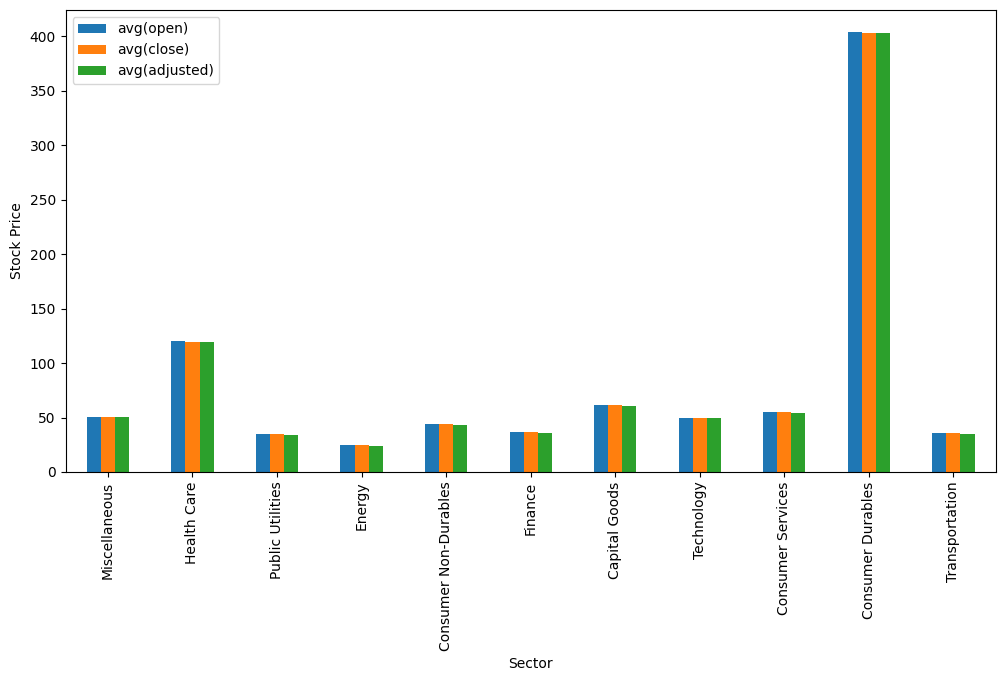

In [36]:
import matplotlib.pyplot as plt

sec_df =  data.select(['sector', 
                       'open', 
                       'close', 
                       'adjusted']
                     )\
                     .groupBy('sector')\
                     .mean()\
                     .toPandas()

ind = list(range(12))

ind.pop(6)

sec_df.iloc[ind ,:].plot(kind = 'bar', x='sector', y = sec_df.columns.tolist()[1:], 
                         figsize=(12, 6), ylabel = 'Stock Price', xlabel = 'Sector')
plt.show()

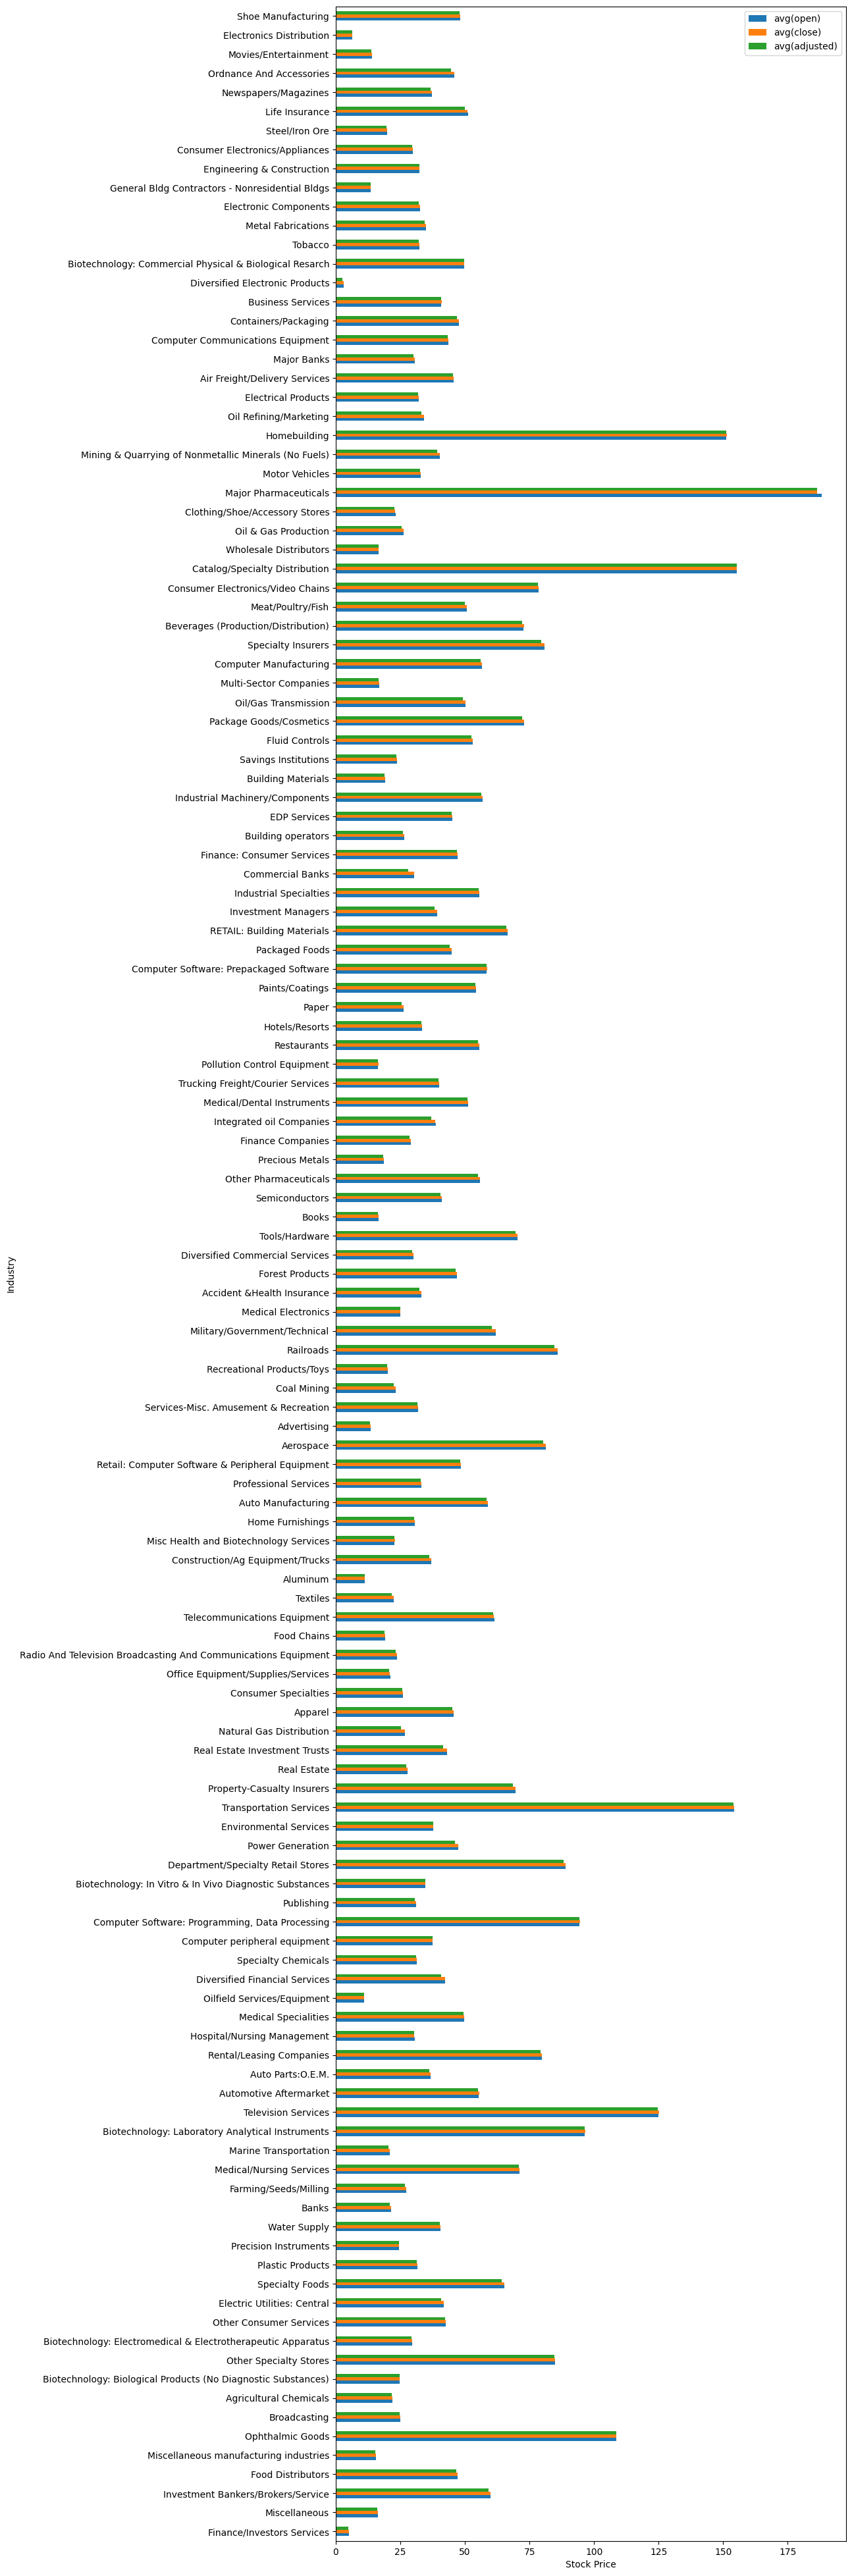

In [37]:
industries_x = data.select(['industry', 'open', 'close', 'adjusted']).groupBy('industry').mean().toPandas()

q  = industries_x[(industries_x.industry != 'Major Chemicals') & (industries_x.industry != 'Building Products')]

q.plot(kind = 'barh', x='industry', y = q.columns.tolist()[1:], figsize=(10, 50), xlabel='Stock Price', ylabel = 'Industry')

plt.show()

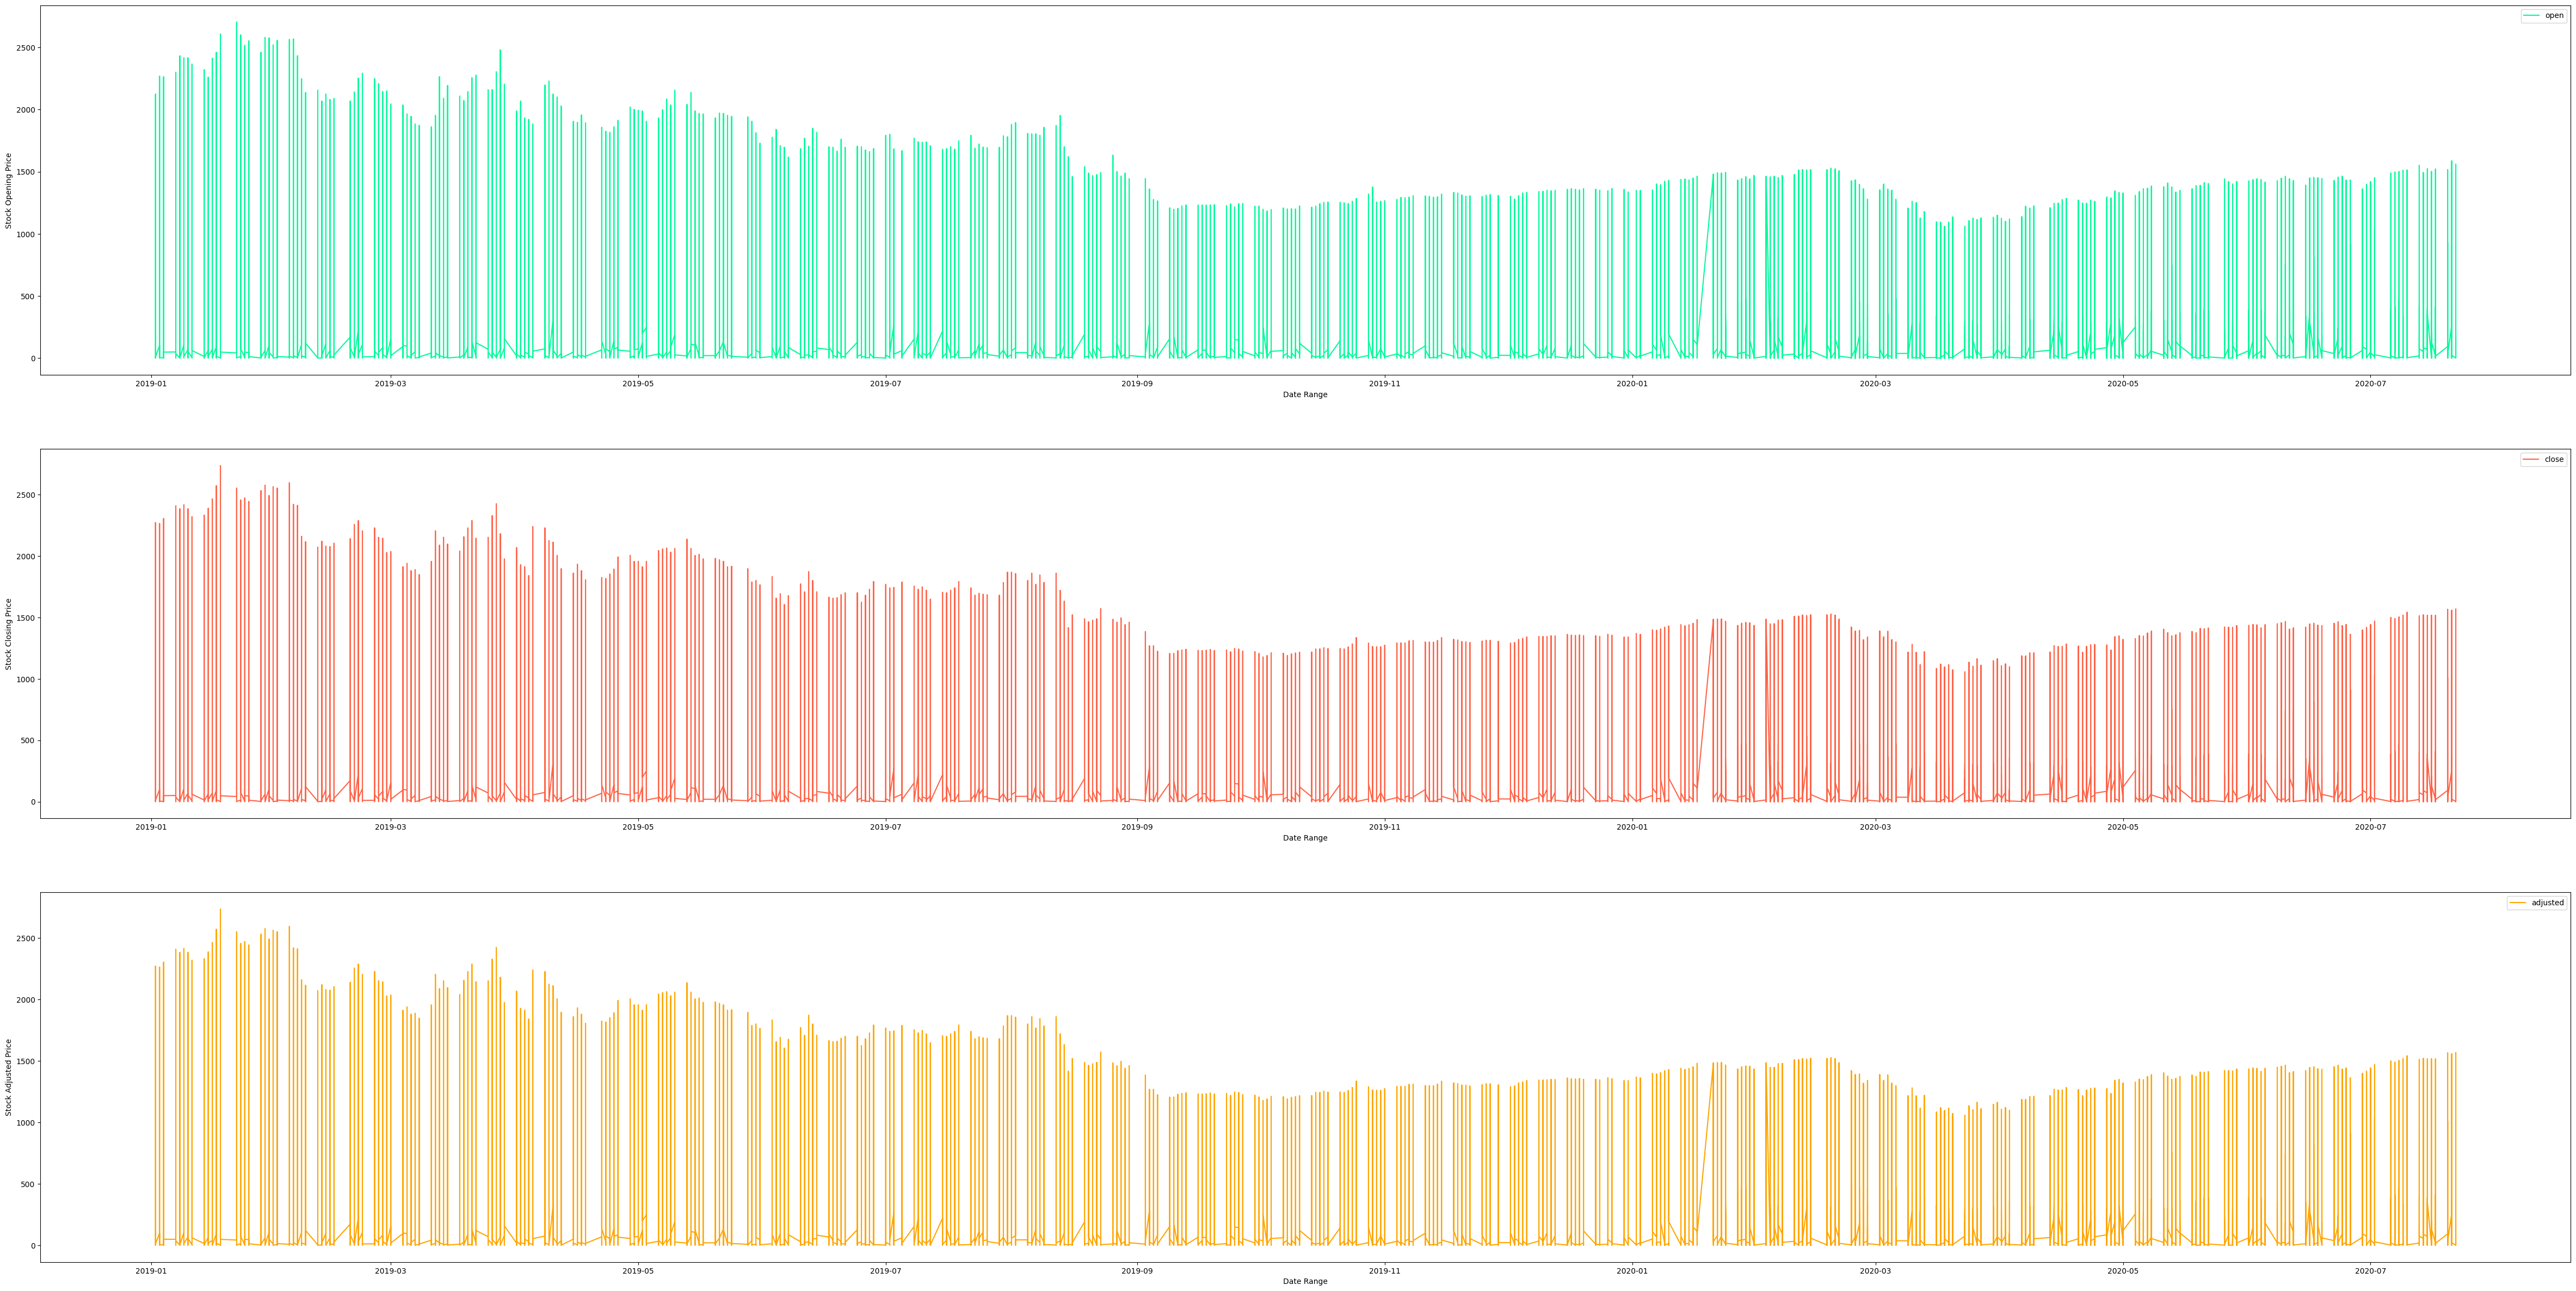

In [40]:
from pyspark.sql.functions import col

tech = data.where(col('sector') == 'Technology')\
           .select('date', 'open', 'close', 'adjusted')

fig, axes = plt.subplots(nrows=3, ncols=1, figsize =(60, 30))

tech.toPandas().plot(kind = 'line', x = 'date', y='open', 
                     xlabel = 'Date Range', ylabel = 'Stock Opening Price', 
                     ax = axes[0], color = 'mediumspringgreen')

tech.toPandas().plot(kind = 'line', x = 'date', y='close',
                     xlabel = 'Date Range', ylabel = 'Stock Closing Price',
                     ax = axes[1], color = 'tomato')

tech.toPandas().plot(kind = 'line', x = 'date', y='adjusted', 
                     xlabel = 'Date Range', ylabel = 'Stock Adjusted Price', 
                     ax = axes[2], color = 'orange')

plt.show()

In [41]:
spark.stop

<bound method SparkSession.stop of <pyspark.sql.session.SparkSession object at 0x7f2b702f42b0>>